<a href="https://colab.research.google.com/github/dealtron/Bank-Classification/blob/main/Bank_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Course - Telkom Digital Talent Incubator*


---




# **Classification**

Disini kita membuat model classification menggunakan data bank.csv (https://www.kaggle.com/janiobachmann/bank-marketing-dataset). Di dalam data ini terdapat 17 atribute, yaitu :

1.   age (18 - 95),
2.   job ('admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'),
3.   marital ('divorced', 'married', 'single'),
4.   education ('primary', 'secondary', 'tertiary', 'unknown'),
5.   default ('no', 'yes'),
6.   housing ('no', 'yes'),
7.   loan ('no', 'yes'),
8.   balance ((-6847) - 81204),
9.   contact ('cellular', 'telephone', 'unknown'),
10.   month ('apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'),
11.   day (1 - 31),
12.   duration (2 - 3881),
13.   campaign (1 - 63),
14.   pdays ((-1) - 854),
15.   previous (0 - 58),
16.   poutcome ('failure', 'other', 'success', 'unknown'),
17.   deposit ('no', 'yes').

Disini saya akan mencoba untuk menganalisa data yang ada dan mengklasifikasi data tersebut apakah seseorang tersebut layak untuk mendapatkan deposit atau tidak.

**Import Libraries**

Kita disini akan mengimport libraries yang akan digunakan pada classification.

In [135]:
# Import Library
import pandas as pd
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

Lalu saya akan mengimport raw dataset yang telah disediakan, kemudian melihat setiap atribute yang tipe datanya adalah categorical.

In [136]:
# Import Data to Google Colab
df_bank = pd.read_csv('https://raw.githubusercontent.com/dealtron/Bank-Classification/main/data/bank.csv', sep = ',')
df_bank

for i in df_bank.select_dtypes(include='object').columns:
    print(i)
    print(df_bank[i].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


Lalu kita coba lihat seperti apa data yang kita punya.

In [137]:
# Show 10 first Row
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Kemudian kita lihat perbandingan target (deposit) yang datasetnya akan diklasifikasikan.

no     5873
yes    5289
Name: deposit, dtype: int64


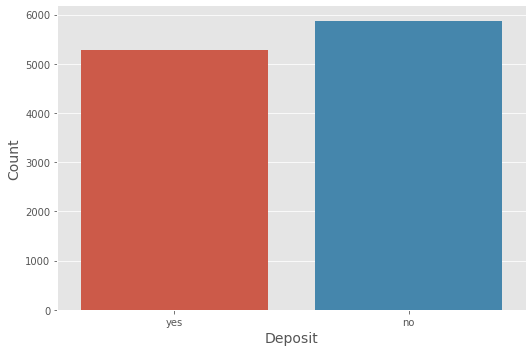

In [138]:
c_depo = df_bank['deposit'].value_counts()
print(c_depo)
sns.catplot(x='deposit',kind="count", data=df_bank, height=5, aspect=1.5)
plt.xlabel("Deposit", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

Disini saya akan mengubah atribute deposit, loan, housing, default, dan month menjadi angka. Dimana pada atribute deposit, loan, housing, dan default, saya menerapkan ("yes" = 1) dan ("no" = 0). Dan untuk months, saya membuat months menjadi nominal, ex : ("jan" = 1),("feb" = 2),...,(des = 12).

In [139]:
df_bank.deposit.replace(('yes', 'no'), (1, 0), inplace=True)
df_bank.loan.replace(('yes', 'no'), (1, 0), inplace=True)
df_bank.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df_bank.default.replace(('yes', 'no'), (1, 0), inplace=True)
df_bank.month.replace(('jan', 'feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'), (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

In [140]:
# Prints the Dataset Information
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  int64 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  int64 
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(12), object(5)
memory usage: 1.4+ MB


In [141]:
# Prints Descriptive Statistics
df_bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
default,11162.0,0.015051,0.121761,0.0,0.0,0.0,0.00,1.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
housing,11162.0,0.473123,0.499299,0.0,0.0,0.0,1.00,1.0
loan,11162.0,0.130801,0.337198,0.0,0.0,0.0,0.00,1.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
month,11162.0,6.190826,2.572792,1.0,5.0,6.0,8.00,12.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0


**Data Preprocessing**

Disini kita ingin melihat apakah ada data yang kosong/null pada tiap data atribute di dataset yang akan kita gunakan.

In [142]:
# Check for Missing Values
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Setelah dicek, tidak ada data yang kosong di dataset kita, oleh karena itu tidak perlu digunakan penggantian/penambahan data pada dataset.

**Encode Categorical Data**

Disini kita akan me encode categorical data yang mempunyai variable lebih dari 2 (bukan hanya "yes" dan "no"), lalu tiap atribute yang telah diencode akan didrop dan tiap uniqie variable akan dijadikan atribute baru. Disini atributes yang akan digantikan oleh unique variable yaitu :
1. job ('admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'),
2. marital ('divorced', 'married', 'single'),
3. education ('primary', 'secondary', 'tertiary', 'unknown'),
4. contact ('cellular', 'telephone', 'unknown'),
5. poutcome ('failure', 'other', 'success', 'unknown').

In [143]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank[['job', 'marital', 'education', 'contact','poutcome']]))
df_encoded.columns = encoder.get_feature_names(['job', 'marital', 'education', 'contact','poutcome'])

# Replace Categotical Data with Encoded Data
df_bank.drop(['job', 'marital', 'education', 'contact','poutcome'] ,axis=1, inplace=True)
df_encoded= pd.concat([df_bank, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,5,1042,1,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,56,0,45,0,0,5,5,1467,1,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41,0,1270,1,0,5,5,1389,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,55,0,2476,1,0,5,5,579,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,54,0,184,0,0,5,5,673,2,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,4,257,1,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,0,733,0,0,16,6,83,4,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11159,32,0,29,0,0,19,8,156,2,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,0,0,1,8,5,9,2,172,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


**Set Feature and Target**

Disini saya akan memisahkan feature dan target pada dataset ini.

In [144]:
# Select Features
feature = df_encoded.drop(['deposit'], axis=1)
feature

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,5,1042,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,56,0,45,0,0,5,5,1467,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41,0,1270,1,0,5,5,1389,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,55,0,2476,1,0,5,5,579,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,54,0,184,0,0,5,5,673,2,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,4,257,1,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,0,733,0,0,16,6,83,4,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11159,32,0,29,0,0,19,8,156,2,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,0,0,1,8,5,9,2,172,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [145]:
# Select Target
target = df_bank['deposit']
target

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

Set Training and Testing Data

Disini saya akan mensplot data saya menjadi data training dan data testing, 20% testing dan 80% training data.

In [146]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(feature , target, shuffle = True, test_size=0.2, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8929, 37)
(2233, 37)
(8929,)
(2233,)


In [147]:
X_test

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8422,31,0,554,1,0,5,2,94,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9226,43,0,514,1,1,20,4,34,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8162,26,0,277,0,0,14,5,514,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4337,39,0,91,0,0,3,9,213,1,185,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2438,40,0,0,0,0,6,8,131,2,98,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,36,0,465,1,0,20,5,160,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4360,28,0,1377,1,0,14,5,688,2,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2316,52,0,1306,0,0,15,6,288,1,-1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5073,30,0,102,1,0,18,12,364,3,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### ***Decision Tree***

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

**Modeling Decision Tree**

In [148]:
# Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

# Predict to Test Data 
y_pred_dtc = dtc.predict(X_test)

In [149]:
dfe_col = print(df_encoded.columns.tolist())

['age', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'deposit', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


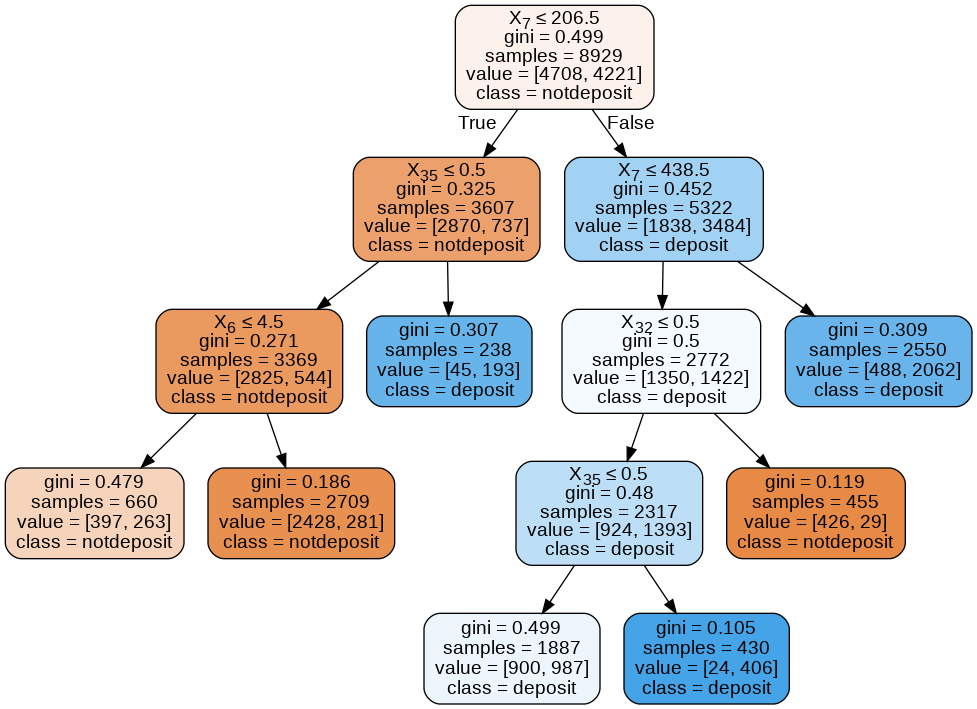

In [150]:
# Visualize Tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['notdeposit', 'deposit'],
                feature_names=dfe_col)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Model Evaluation**

In [151]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[815, 350],
       [157, 911]])

In [152]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
prec_dtc = metrics.precision_score(y_test, y_pred_dtc)
rec_dtc = metrics.recall_score(y_test, y_pred_dtc)
f1_dtc = metrics.f1_score(y_test, y_pred_dtc)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_dtc)

print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.7729511867442902
Precision: 0.7224425059476606
Recall: 0.852996254681648
F1 Score: 0.7823100042936882
Cohens Kappa Score: 0.5484410454693576


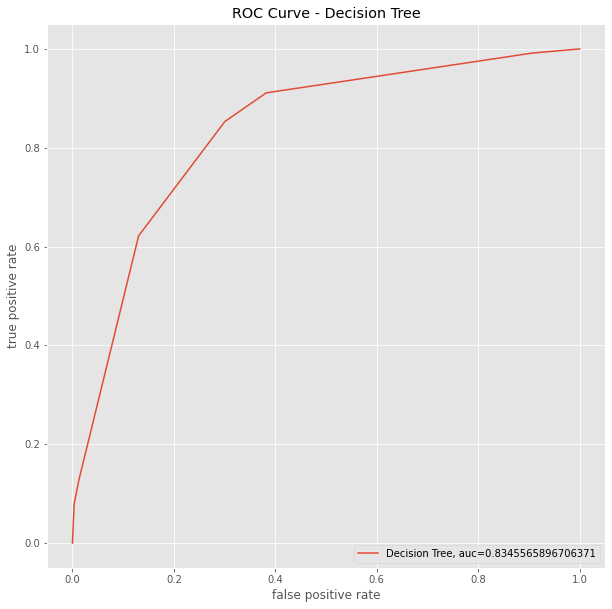

In [153]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

Decision Tree Advantages :
1. Inexpensive to construct,
2.  Extremely fast at classifying unknown records,
3.  Easy to interpret for small-sized trees,
4.  Accuracy is comparable to other classification techniques for many simple.
data sets

Decision Tree Disadvantages :
1. Overfitting when algorithm capture noise in the data,
2. The model can get unstable due to small variation of data,
3. Low biased tree: difficult for the model to work with new data.

#### ***Naive Bayes***

Naive Bayes is a simple technique for constructing classifiers, models that assign class labels to problem instances, represented as
vectors of feature values, where the class labels are drawn from
some finite set. 

**Modeling Naive Bayes**

In [154]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

**Model Evaluation**

In [155]:
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[915, 250],
       [382, 686]])

In [156]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7169726824899239
Precision: 0.7329059829059829
Recall: 0.6423220973782772
F1 Score: 0.6846307385229541
Cohens Kappa Score: 0.42994204317597573


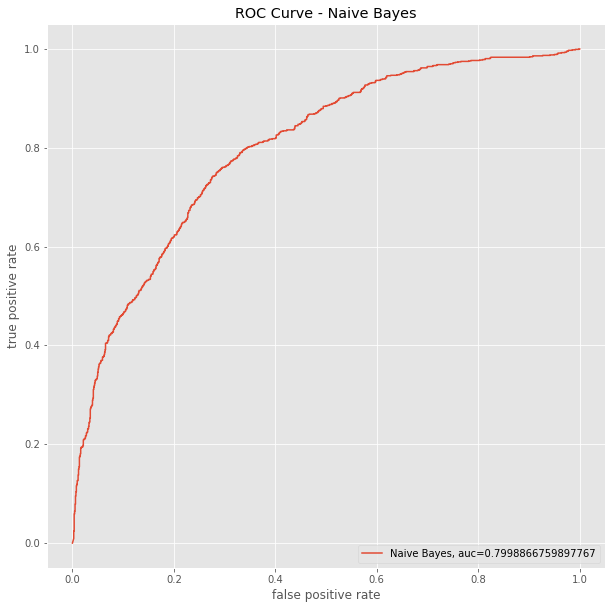

In [157]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

Naive Bayes summary :
1. Robust to isolated noise points
2. Handle missing values by ignoring the instance during probability
estimate calculations
3. Robust to irrelevant attributes
4. Independence assumption may not hold for some attributes
5. Use other techniques such as Bayesian Belief Networks (BBN)

#### ***K-Nearest Neighbor***

K-nearest neighbors of a record x are data points that have the k smallest distance to x.

**Modelling K-NN**

In [158]:
# Import Module
from sklearn.neighbors import KNeighborsClassifier

# Modeling KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict to Test Data
y_pred_knn= knn.predict(X_test)

**Model Evaluation**

In [159]:
# Show the Confussion Matrix
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[917, 248],
       [305, 763]])

In [160]:
# Show the Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
prec_knn = metrics.precision_score(y_test, y_pred_knn)
rec_knn = metrics.recall_score(y_test, y_pred_knn)
f1_knn = metrics.f1_score(y_test, y_pred_knn)
kappa_knn = metrics.cohen_kappa_score(y_test, y_pred_knn)

print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)
print("Cohens Kappa Score:", kappa_knn)

Accuracy: 0.7523510971786834
Precision: 0.7546983184965381
Recall: 0.7144194756554307
F1 Score: 0.7340067340067341
Cohens Kappa Score: 0.5026607880830203


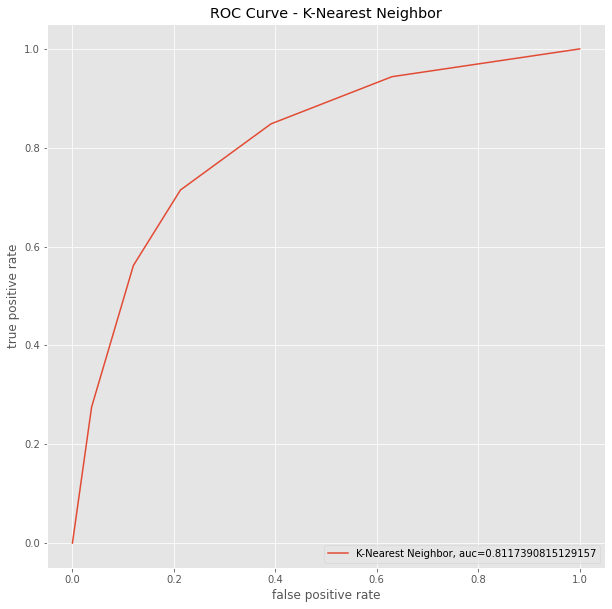

In [161]:
# ROC Curve
y_pred_knn_proba = knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fprknn,tprknn,label="K-Nearest Neighbor, auc="+str(aucknn))
plt.title('ROC Curve - K-Nearest Neighbor')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

Advantages:
1. Simple technique that is easily implemented
2. Building model is cheap
3. Extremely flexible classification scheme

Disadvantages:
1. Classifying unknown records are relatively expensive
2. Requires distance computation of k-nearest neighbors
3. Computationally intensive, especially when the size of the training set grows
4. Accuracy can be severely degraded by the presence of noisy or irrelevant
features

#### ***Searching Best K-Nearest Neighbor***

Disini saya ingin mencoba GridSearch untuk model K-Nearest Neighbor untuk mendapatkan parameter terbaik pada model ini. Disini saya akan mencoba k = 1,3,5,7,10,15,20, dan 25.

In [162]:
# this is pipeline
pipe_knn= make_pipeline(StandardScaler(), KNeighborsClassifier())
 
# grid searh with k = 1,3,5,7,10,15,20, dan 25
gs_knn=GridSearchCV(estimator= pipe_knn,
               param_grid={'kneighborsclassifier__n_neighbors':[1,3,5,7,10,15,20,25]},
               scoring='accuracy',
               cv=10)

# nested cross validation
gs_knn_scores = cross_val_score(gs_knn, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fitting Xtrain and ytrain
gs_knn.fit(X_train, y_train)
gs_knn_best = gs_knn.best_estimator_
gs_knn_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_knn.score(X_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_knn_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_knn.score(X_test, y_test)*100))
gs_knn.best_params_

Train Accuracy:   77.4%
CV Mean Accuracy: 73.7%
Test Accuracy:    72.7%


{'kneighborsclassifier__n_neighbors': 15}

Dari sini kita bisa tahu bahwa k = 15 adalah parameter yang terbaik dari semua parameter yang telah diuji

In [173]:
gs_knn_pred = gs_knn_best.predict(X_test)
cm_gs_knn = metrics.confusion_matrix(y_test, gs_knn_pred)
print(cm_gs_knn)

[[945 220]
 [389 679]]


In [174]:
# Calculate accuracy, precision, recall, f1-score, and kappa score
gs_knn_acc = metrics.accuracy_score(y_test, gs_knn_pred)
gs_knn_prec = metrics.precision_score(y_test, gs_knn_pred)
gs_knn_rec = metrics.recall_score(y_test, gs_knn_pred)
gs_knn_f1 = metrics.f1_score(y_test, gs_knn_pred)
gs_knn_kappa = metrics.cohen_kappa_score(y_test, gs_knn_pred)

print("Accuracy:", gs_knn_acc)
print("Precision:", gs_knn_prec)
print("Recall:", gs_knn_rec)
print("F1 Score:", gs_knn_f1)
print("Cohens Kappa Score:", gs_knn_kappa)

Accuracy: 0.7272727272727273
Precision: 0.7552836484983315
Recall: 0.6357677902621723
F1 Score: 0.6903914590747331
Cohens Kappa Score: 0.4498903135741351


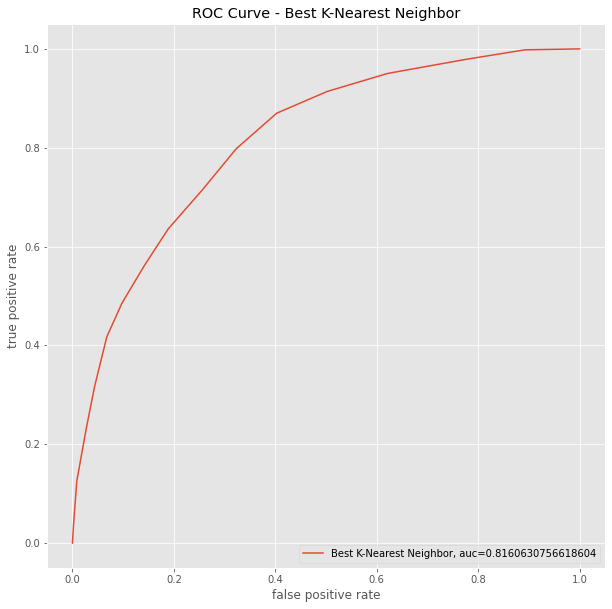

In [175]:
y_pred_gs_knn_best_proba = gs_knn_best.predict_proba(X_test)[::,1]
fpr_gs_knn_best, tpr_gs_knn_best, _ = metrics.roc_curve(y_test,  y_pred_gs_knn_best_proba)
auc_gs_knn_best = metrics.roc_auc_score(y_test, y_pred_gs_knn_best_proba)
plt.plot(fpr_gs_knn_best,tpr_gs_knn_best,label="Best K-Nearest Neighbor, auc="+str(auc_gs_knn_best))
plt.title('ROC Curve - Best K-Nearest Neighbor')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***Random Forest***

Random forest or Random Decision Forest is a method that
operates by constructing multiple decision trees during training
phases

In [165]:
# Import Module
from sklearn.ensemble import RandomForestClassifier

# Modeling Random Forest
rfo = RandomForestClassifier()
rfo.fit(X_train, y_train)

# Predict to Test Data
y_pred_rfo= rfo.predict(X_test)

In [166]:
# Show the Confussion Matrix
cm_rfo = metrics.confusion_matrix(y_test, y_pred_rfo)
cm_rfo

array([[963, 202],
       [143, 925]])

In [167]:
# Show the Accuracy, Precision, Recall
acc_rfo = metrics.accuracy_score(y_test, y_pred_rfo)
prec_rfo = metrics.precision_score(y_test, y_pred_rfo)
rec_rfo = metrics.recall_score(y_test, y_pred_rfo)
f1_rfo = metrics.f1_score(y_test, y_pred_rfo)
kappa_rfo = metrics.cohen_kappa_score(y_test, y_pred_rfo)

print("Accuracy:", acc_rfo)
print("Precision:", prec_rfo)
print("Recall:", rec_rfo)
print("F1 Score:", f1_rfo)
print("Cohens Kappa Score:", kappa_rfo)

Accuracy: 0.8454993282579489
Precision: 0.8207630878438332
Recall: 0.8661048689138576
F1 Score: 0.8428246013667428
Cohens Kappa Score: 0.6911248382723985


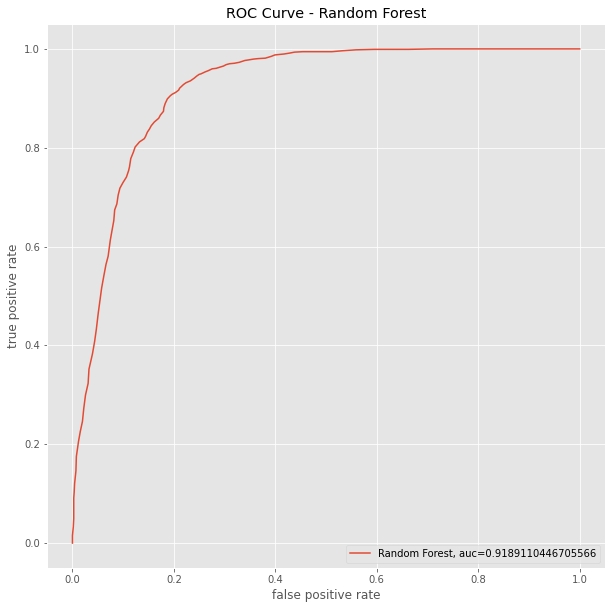

In [168]:
y_pred_rfo_proba = rfo.predict_proba(X_test)[::,1]
fprrfo, tprrfo, _ = metrics.roc_curve(y_test,  y_pred_rfo_proba)
aucrfo = metrics.roc_auc_score(y_test, y_pred_rfo_proba)
plt.plot(fprrfo,tprrfo,label="Random Forest, auc="+str(aucrfo))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

Advantages:
1. It can be used for both regression and classification tasks and that it’s easy to view the relative importance it assigns to the input features,
2. It is also considered as a very handy and easy to use algorithm, because it’s
default hyper-parameters often produce a good prediction result.

Disadvantages:
1. Many trees can make the algorithm to slow and ineffective for real-time
predictions. A more accurate prediction requires more trees, which results
in a slower model,
2. It is a predictive modeling tool and not a descriptive tool.

#### ***Model Comparison***

In [169]:
# Comparing Model Performance
print("Decision Tree Accuracy = {0:.2f}%".format(acc_dtc*100))
print("Decision Tree Precision = {0:.2f}%".format(prec_dtc*100))
print("Decision Tree Recall = {0:.2f}%".format(rec_dtc*100))
print("Decision Tree F1-Score = {0:.2f}%".format(f1_dtc*100))
print("_______________________")
print("Naive Bayes Accuracy = {0:.2f}%".format(acc_gnb*100))
print("Naive Bayes Precision = {0:.2f}%".format(prec_gnb*100))
print("Naive Bayes Recall = {0:.2f}%".format(rec_gnb*100))
print("Naive Bayes F1-Score = {0:.2f}%".format(f1_gnb*100))
print("_______________________")
print("K-Nearest Neighbor Accuracy = {0:.2f}%".format(acc_knn*100))
print("K-Nearest Neighbor Precision = {0:.2f}%".format(prec_knn*100))
print("K-Nearest Neighbor Recall = {0:.2f}%".format(rec_knn*100))
print("K-Nearest Neighbor F1-Score = {0:.2f}%".format(f1_knn*100))
print("_______________________")
print("Random Forest Accuracy = {0:.2f}%".format(acc_rfo*100))
print("Random Forest Precision = {0:.2f}%".format(prec_rfo*100))
print("Random Forest Recall = {0:.2f}%".format(rec_rfo*100))
print("Random Forest F1-Score = {0:.2f}%".format(f1_rfo*100))
print("_______________________")
print("Best K-Nearest Neighbor Accuracy: {0:.2f}%".format(gs_knn_acc*100))
print("Best K-Nearest Neighbor Precision: {0:.2f}%".format(gs_knn_prec*100))
print("Best K-Nearest Neighbor Recall: {0:.2f}%".format(gs_knn_rec*100))
print("Best K-Nearest Neighbor F1 Score: {0:.2f}%".format(gs_knn_f1*100))
print("Best K-Nearest Neighbor Cohens Kappa Score: {0:.2f}%".format(gs_knn_kappa*100))

Decision Tree Accuracy = 77.30%
Decision Tree Precision = 72.24%
Decision Tree Recall = 85.30%
Decision Tree F1-Score = 78.23%
_______________________
Naive Bayes Accuracy = 71.70%
Naive Bayes Precision = 73.29%
Naive Bayes Recall = 64.23%
Naive Bayes F1-Score = 68.46%
_______________________
K-Nearest Neighbor Accuracy = 75.24%
K-Nearest Neighbor Precision = 75.47%
K-Nearest Neighbor Recall = 71.44%
K-Nearest Neighbor F1-Score = 73.40%
_______________________
Random Forest Accuracy = 84.55%
Random Forest Precision = 82.08%
Random Forest Recall = 86.61%
Random Forest F1-Score = 84.28%
_______________________
Best K-Nearest Neighbor Accuracy: 72.73%
Best K-Nearest Neighbor Precision: 75.53%
Best K-Nearest Neighbor Recall: 63.58%
Best K-Nearest Neighbor F1 Score: 69.04%
Best K-Nearest Neighbor Cohens Kappa Score: 44.99%


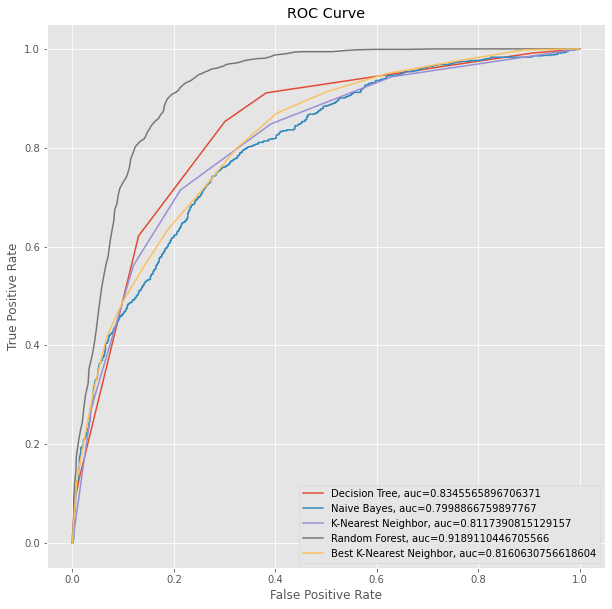

In [170]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.plot(fprknn,tprknn,label="K-Nearest Neighbor, auc="+str(aucknn))
plt.plot(fprrfo,tprrfo,label="Random Forest, auc="+str(aucrfo))
plt.plot(fpr_gs_knn_best,tpr_gs_knn_best,label="Best K-Nearest Neighbor, auc="+str(auc_gs_knn_best))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [171]:
# Create Datafame Contains Fature and Result of prediction
df_compare = X_test.copy()
df_compare['ActualClass'] = y_test
df_compare['DecisonTree'] = y_pred_dtc
df_compare['NaiveBayes'] = y_pred_gnb
df_compare['KNN'] = y_pred_knn
df_compare['Random Forest'] = y_pred_rfo
df_compare['Best KNN'] = gs_knn_pred

In [172]:
df_compare.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ActualClass,DecisonTree,NaiveBayes,KNN,Random Forest,Best KNN
8422,31,0,554,1,0,5,2,94,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0
9226,43,0,514,1,1,20,4,34,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0
8162,26,0,277,0,0,14,5,514,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,1,1,0
4337,39,0,91,0,0,3,9,213,1,185,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,1,1
2438,40,0,0,0,0,6,8,131,2,98,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,1,1


#### ***Kesimpulan***

Disini kita bisa melihat, dari 5 model klasifikasi yang dilakukan, model klasifikasi terbaik yang untuk dataset ini pada :

* Accuracy, Random Forest = 84.55%,
* Precision, Random Forest  = 82.08%,
* Recall, Random Forest = 86.61%%,
* F1-Score, Random Forest = 84.28%,
* AUC, Random Forest = 0.919.

Dari sini kita bisa menyimpulkan bahwa **Random Forest** adalah model klasifikasi terbaik untuk dataset bank.csv.